In [590]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score, precision_score

In [591]:
df = pd.read_csv("data.csv")

In [592]:
df = df[df.liked==1].append(df[df.liked==0][0:60])

In [593]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:13], df.liked, test_size=0.85,random_state=42)

In [594]:
print('y_train ----------------')
print(y_train.value_counts())
print('y_test ----------------')
print(y_test.value_counts())

y_train ----------------
1    14
0    10
Name: liked, dtype: int64
y_test ----------------
1    86
0    50
Name: liked, dtype: int64


## Base Model

In [595]:
rfc_base = RandomForestClassifier(n_estimators=10, random_state=42).fit(X_train, y_train)

In [596]:
tn, fp, fn, tp = confusion_matrix(y_test, rfc_base.predict(X_test)).ravel()
print(("False Positive:", fp),("False Negative:", fn),("Precision Score:", precision_score(y_test, rfc_base.predict(X_test))),("F1 Score",f1_score(y_test, rfc_base.predict(X_test))))

('False Positive:', 8) ('False Negative:', 13) ('Precision Score:', 0.9012345679012346) ('F1 Score', 0.874251497005988)


## Adjust the predict_proba

In [597]:
bar = 0.9

In [598]:
preds = np.where(pd.DataFrame(rfc_base.predict_proba(X_test))[1] > bar, 1, 0)

In [599]:
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
print(("False Positive:", fp),("False Negative:", fn),("Precision Score:", precision_score(y_test, preds)),("F1 Score",f1_score(y_test, preds)))

('False Positive:', 0) ('False Negative:', 77) ('Precision Score:', 1.0) ('F1 Score', 0.18947368421052632)


In [600]:
bar = 0.5
for i in range(17):
  preds = np.where(pd.DataFrame(rfc_base.predict_proba(X_test))[1] > bar, 1, 0)
  tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
  print(("Bar:",'%0.4f'%(bar)), 
        ("False Positive:", fp),
        ("False Negative:", fn),
        ("Precision Score:", precision_score(y_test, preds)),
        ("F1 Score",f1_score(y_test, preds)))
  bar +=0.025

('Bar:', '0.5000') ('False Positive:', 8) ('False Negative:', 13) ('Precision Score:', 0.9012345679012346) ('F1 Score', 0.874251497005988)
('Bar:', '0.5250') ('False Positive:', 8) ('False Negative:', 13) ('Precision Score:', 0.9012345679012346) ('F1 Score', 0.874251497005988)
('Bar:', '0.5500') ('False Positive:', 8) ('False Negative:', 13) ('Precision Score:', 0.9012345679012346) ('F1 Score', 0.874251497005988)
('Bar:', '0.5750') ('False Positive:', 8) ('False Negative:', 13) ('Precision Score:', 0.9012345679012346) ('F1 Score', 0.874251497005988)
('Bar:', '0.6000') ('False Positive:', 5) ('False Negative:', 23) ('Precision Score:', 0.9264705882352942) ('F1 Score', 0.8181818181818182)
('Bar:', '0.6250') ('False Positive:', 5) ('False Negative:', 23) ('Precision Score:', 0.9264705882352942) ('F1 Score', 0.8181818181818182)
('Bar:', '0.6500') ('False Positive:', 5) ('False Negative:', 23) ('Precision Score:', 0.9264705882352942) ('F1 Score', 0.8181818181818182)
('Bar:', '0.6750') ('Fal

# Adjust class_weights

In [601]:
bar = 1
precisionscore = []
f1score = []
barlist = []
fplist = []
for i in range(40):
  rfc_cw = RandomForestClassifier(n_estimators=10,class_weight={0:1,1:bar}, random_state=42).fit(X_train, y_train)
  tn, fp, fn, tp = confusion_matrix(y_test, rfc_cw.predict(X_test)).ravel()
  print(("Bar:",'%0.2f'%(bar)),
        ("False Positive:", fp),
        ("False Negative:", fn),
        ("Precision Score:", precision_score(y_test, rfc_cw.predict(X_test))),
        ("F1 Score", f1_score(y_test, rfc_cw.predict(X_test))))
  
  barlist.append(bar)
  precisionscore.append(precision_score(y_test, rfc_cw.predict(X_test)))
  f1score.append(f1_score(y_test, rfc_cw.predict(X_test)))
  fplist.append(fp)
  bar +=0.25

('Bar:', '1.00') ('False Positive:', 8) ('False Negative:', 13) ('Precision Score:', 0.9012345679012346) ('F1 Score', 0.874251497005988)
('Bar:', '1.25') ('False Positive:', 5) ('False Negative:', 17) ('Precision Score:', 0.9324324324324325) ('F1 Score', 0.8625)
('Bar:', '1.50') ('False Positive:', 5) ('False Negative:', 17) ('Precision Score:', 0.9324324324324325) ('F1 Score', 0.8625)
('Bar:', '1.75') ('False Positive:', 8) ('False Negative:', 17) ('Precision Score:', 0.8961038961038961) ('F1 Score', 0.8466257668711655)
('Bar:', '2.00') ('False Positive:', 8) ('False Negative:', 17) ('Precision Score:', 0.8961038961038961) ('F1 Score', 0.8466257668711655)
('Bar:', '2.25') ('False Positive:', 8) ('False Negative:', 17) ('Precision Score:', 0.8961038961038961) ('F1 Score', 0.8466257668711655)
('Bar:', '2.50') ('False Positive:', 8) ('False Negative:', 17) ('Precision Score:', 0.8961038961038961) ('F1 Score', 0.8466257668711655)
('Bar:', '2.75') ('False Positive:', 8) ('False Negative:',

In [602]:
output_df = pd.DataFrame({
    'Bar': barlist,
    'Precision': precisionscore,
    'F1': f1score,
    'False Positive': fplist
})

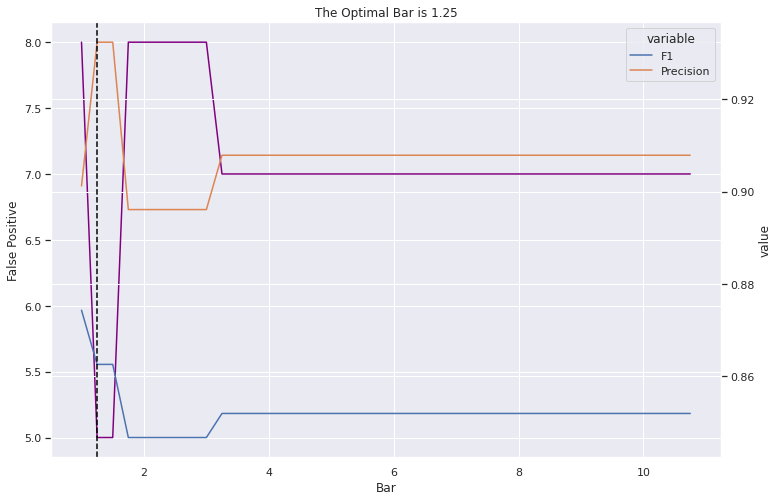

In [603]:
sns.set(rc={'figure.figsize':(12,8)})

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()


sns.lineplot(x='Bar', y= 'False Positive', color = 'purple', 
             data=output_df, ax=ax1, markers=True)

optimal_point = output_df.loc[output_df['Precision']==max(output_df['Precision']),'Bar'].iloc[0]

sns.lineplot(x='Bar', y='value', hue='variable', 
             data=pd.melt(output_df[['Bar','F1','Precision']], ['Bar']), ax=ax2).set_title(f'The Optimal Bar is {optimal_point}')

plt.axvline(optimal_point, ls='--', color='black')



In [604]:
output_df.loc[output_df['Precision']==max(output_df['Precision'])].head(1)

,Bar,Precision,F1,False Positive
1,1.25,0.932432,0.8625,5
